# Population

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

import pickle as pk

jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('../data/SHR65_22.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Rural Alaska
197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,1,...,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Birmingham-Hoover, AL"
197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,1,...,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Mobile, AL"


In [3]:
pop = pd.read_csv('../data/US_states_population.csv', index_col=0)
pop.head()

,population
California,38965193
Texas,30503301
Florida,22610726
New York,19571216
Pennsylvania,12961683


In [4]:
no = map_data[map_data['Solved']=='No'].groupby(['State']).count()['Ori'].to_frame()
no.rename(columns={'Ori': 'Solved'}, inplace=True)

yes = map_data[map_data['Solved']=='Yes'].groupby(['State']).count()['Ori'].to_frame()
yes.rename(columns={'Ori': 'Not Solved'}, inplace=True)

full = map_data.groupby(['State']).count()['Ori'].to_frame()
full.rename(columns={'Ori': 'All Cases'}, inplace=True)

In [6]:
states = pd.concat([pop, full, yes, no], axis=1)

<AxesSubplot:>

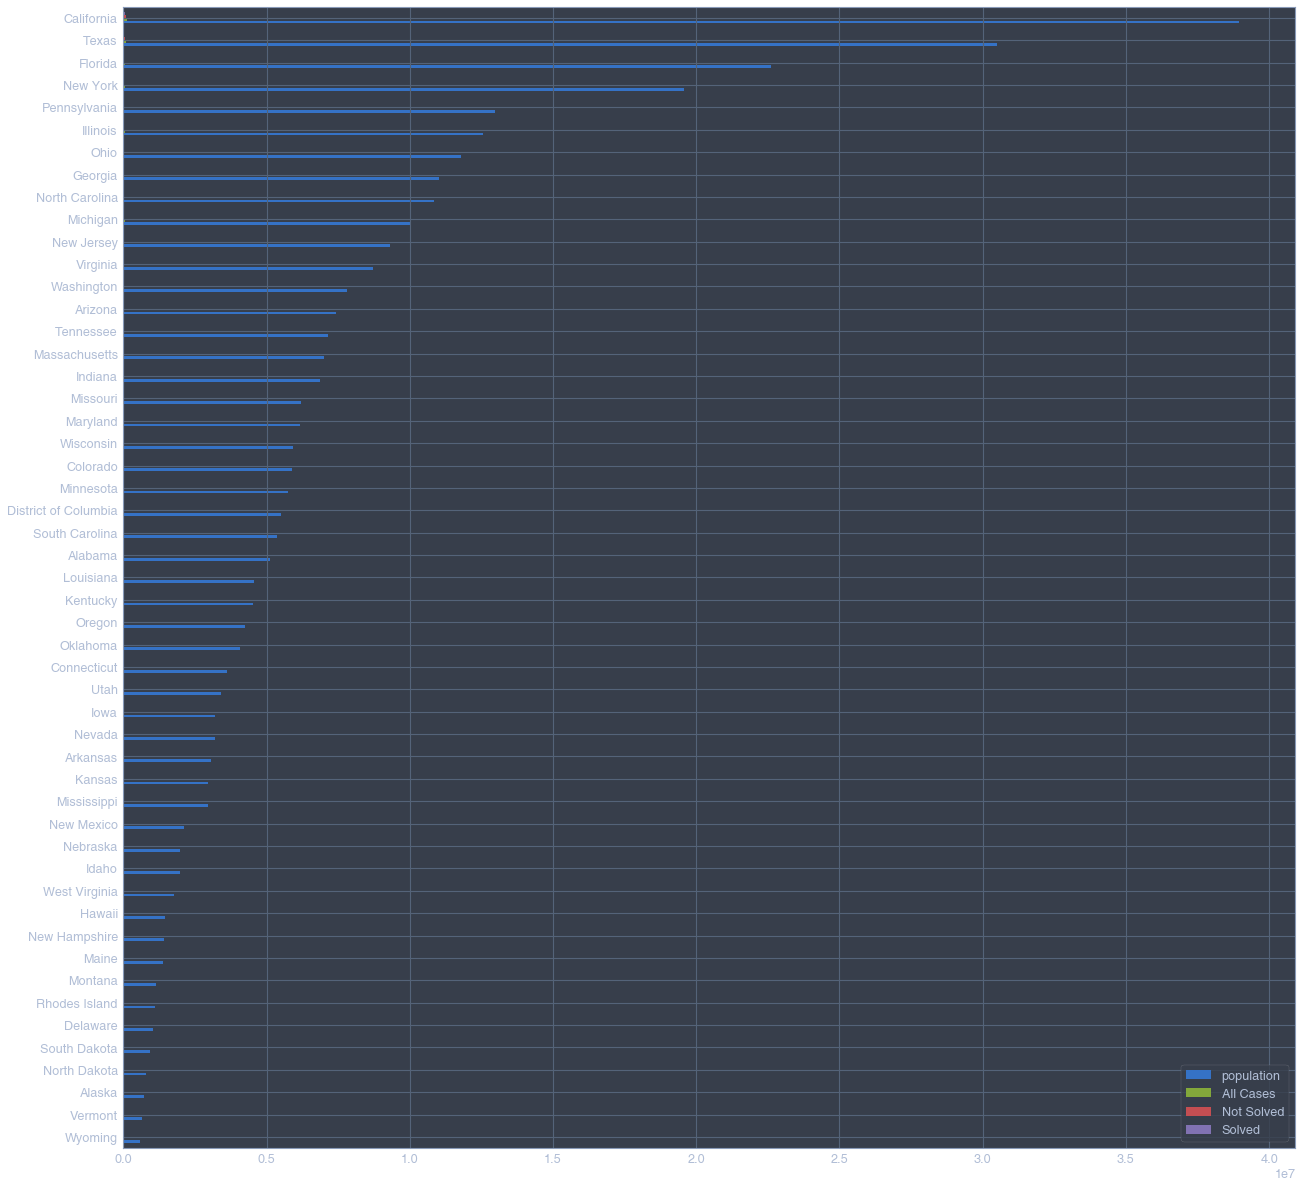

In [18]:
df = pd.DataFrame(index=states.index, data=preprocessing.normalize(states))
df.rename(columns={k: v for k, v in enumerate(states.columns)}, inplace=True)

fig, ax = plt.subplots(1, figsize=(21, 21))
states.sort_values(by='population').plot(kind='barh', ax=ax)